In [18]:
import  numpy as  np
import  pandas as  pd
import  seaborn as  sns 
import  matplotlib  
import  matplotlib_inline
import  matplotlib.pyplot as  plt
from  sklearn.model_selection import  train_test_split
%matplotlib  inline
sns.set(style="ticks") 
from  io import  StringIO
from  IPython.display import  Image
import  graphviz
import  pydotplus
from  sklearn.metrics import  mean_absolute_error


ModuleNotFoundError: No module named 'graphviz'

In [19]:
data = pd.read_csv('cwurData.csv', sep=",")

In [20]:
data.shape

(2200, 14)

In [21]:
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [22]:
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [23]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [24]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2200


In [25]:
(200 / 2200) * 100

9.090909090909092

In [26]:
# Задание формата графиков для сохранения высокого качества PNG 
from  IPython.display import  set_matplotlib_formats 
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
 
#  Задание  ширины  графиков,  чтобы  они  помещались  на  A4
pd.set_option("display.width", 70)


In [27]:
#  Удаление  строк,  содержащих  пустые  значения 
data_no_null = data.dropna(axis=0, how='any') 
(data.shape, data_no_null.shape)

((2200, 14), (2000, 14))

In [28]:
data_no_null.head(11)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014
206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014
207,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014
208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
209,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014


In [29]:
total_count = data_no_null.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2000


In [30]:
from  sklearn.preprocessing import  LabelEncoder, OneHotEncoder

In [78]:
le = LabelEncoder()
# "institution" 
le.fit(data_no_null.institution.drop_duplicates()) 
data_no_null.institution = le.transform(data_no_null.institution)
# "country" 
le.fit(data_no_null["country"].drop_duplicates()) 
data_no_null["country"] = le.transform(data_no_null["country"])

/tmp/ipykernel_156/4210865855.py:4: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame. 
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
data_no_null.institution = le.transform(data_no_null.institution)
/tmp/ipykernel_156/4210865855.py:7: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame. 
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
data_no_null["country"] = le.transform(data_no_null["country"])


SyntaxError: invalid syntax (Temp/ipykernel_11348/3298391614.py, line 9)

<AxesSubplot:>

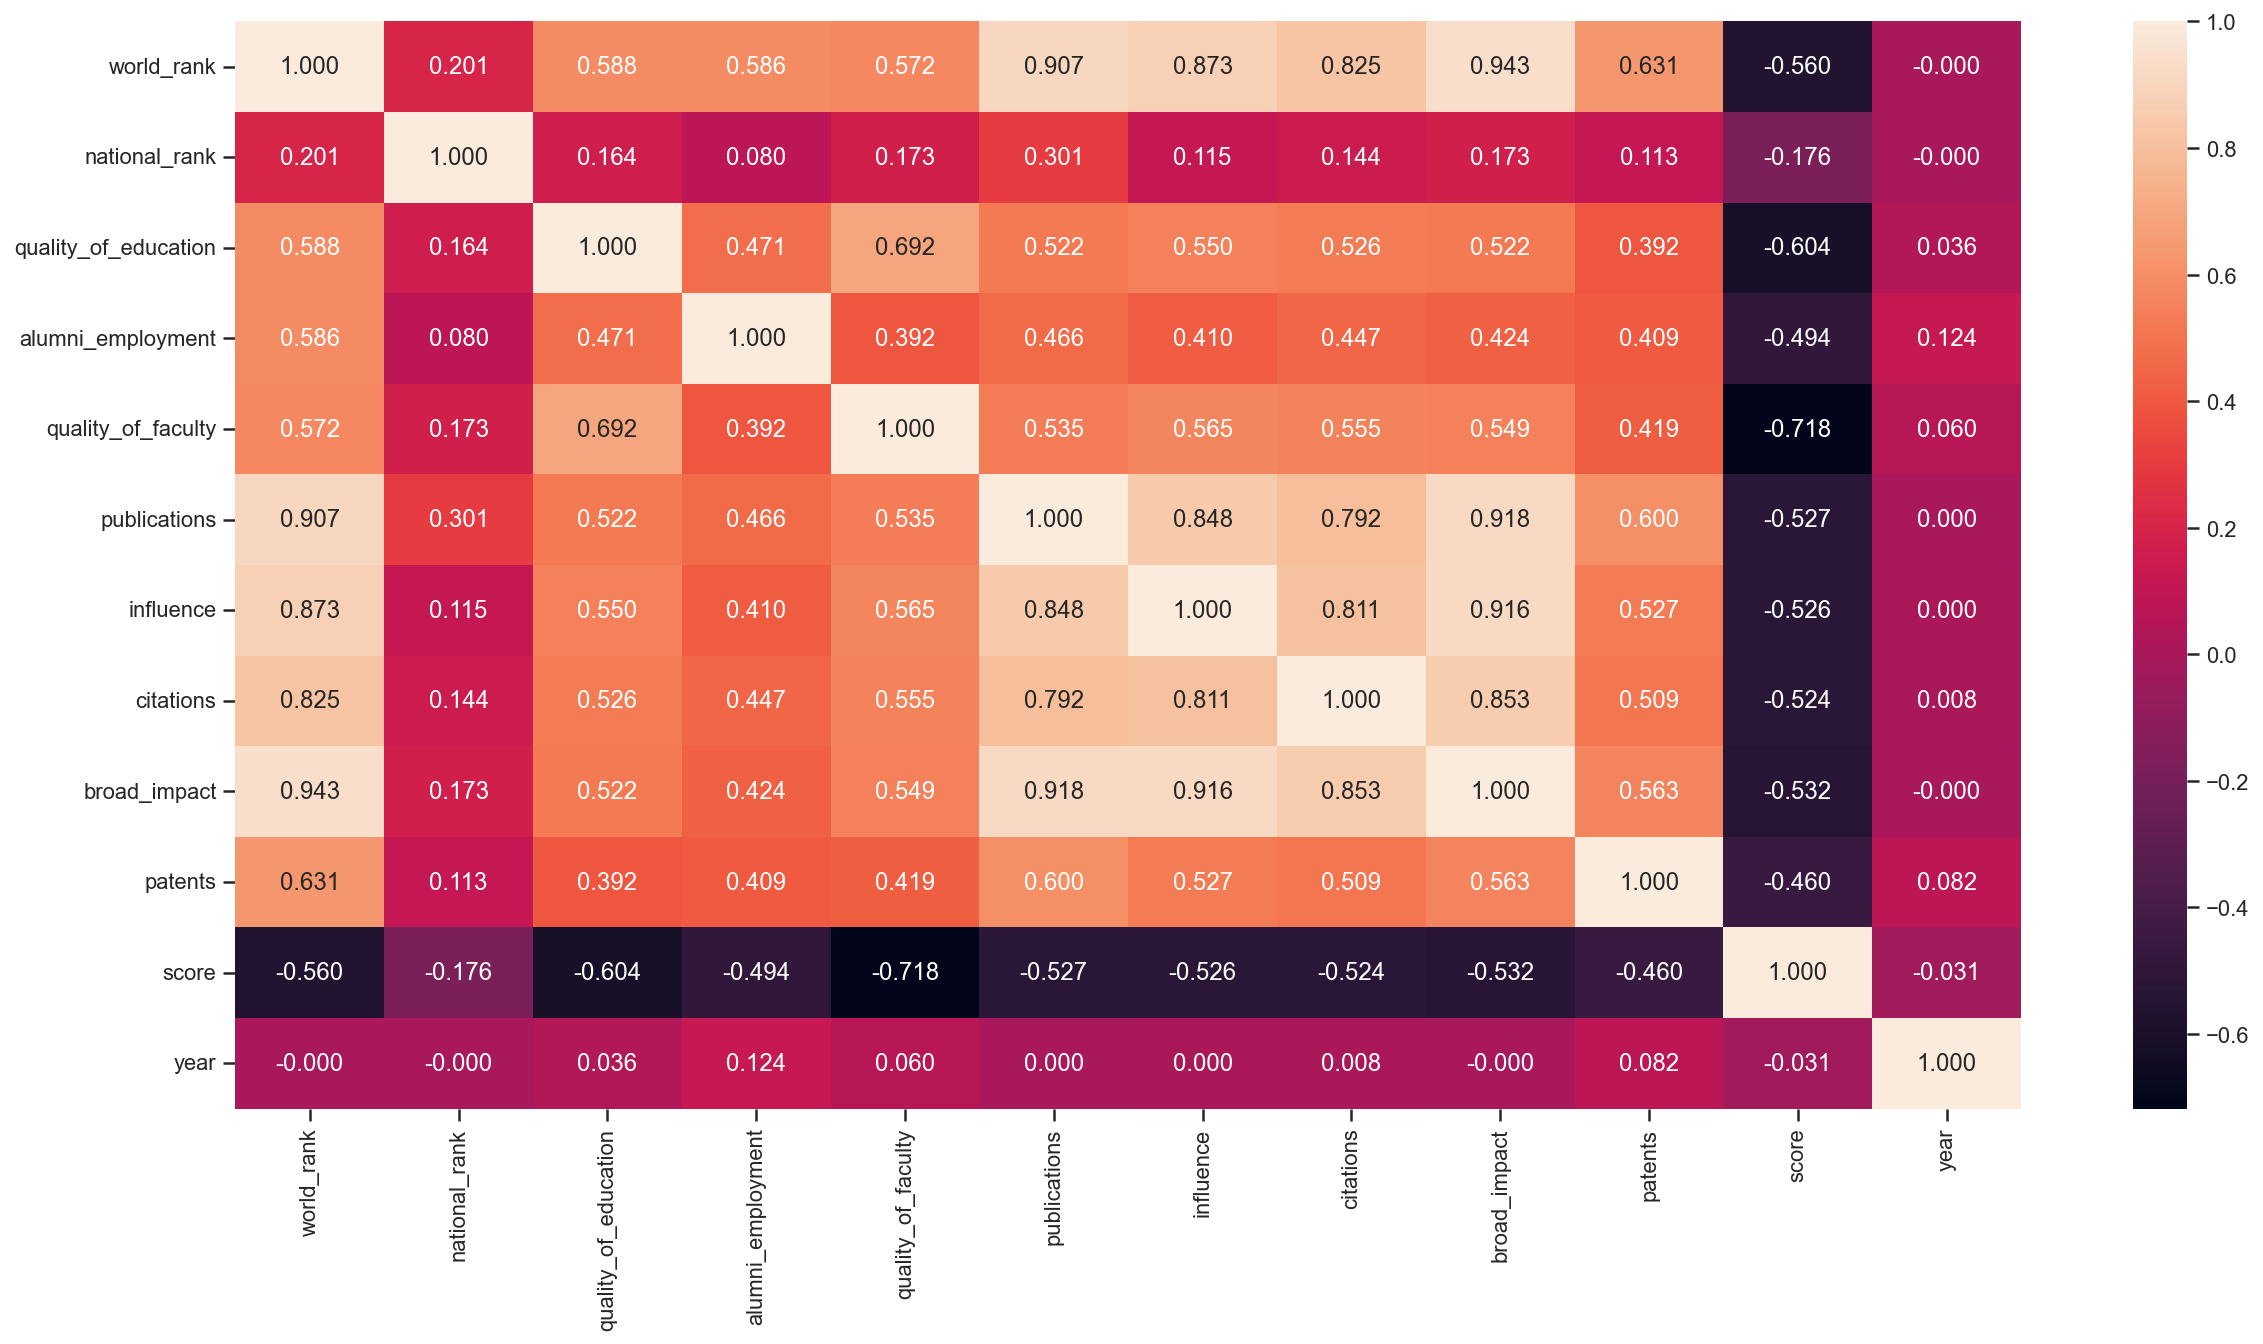

In [32]:
ig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(data_no_null.corr(method='pearson'), ax=ax, annot=True, fmt='.3f')

In [33]:
X = data_no_null[["broad_impact", "publications", "influence"]] 
Y = data_no_null["world_rank"]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())


Входные данные:

      broad_impact  publications  influence
200           1.0             1          1
201           4.0             5          3
202           2.0            15          2
203          13.0            10          9
204          12.0            11         12 

Выходные данные:

 200    1
201    2
202    3
203    4
204    5
Name: world_rank, dtype: int64


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state =  2022, test_size =  0.1)

In [35]:
X_train.head()

,broad_impact,publications,influence
2164,932.0,875,832
1710,590.0,576,792
428,164.0,200,149
1389,164.0,233,251
2089,932.0,675,775


In [36]:
X_test.head()

,broad_impact,publications,influence
1218,14.0,3,20
1495,265.0,236,235
843,703.0,943,599
2042,850.0,803,933
1869,606.0,701,658


In [37]:
Y_train.head()

2164    965
1710    511
428     229
1389    190
2089    890
Name: world_rank, dtype: int64

In [38]:
Y_test.head()

1218     19
1495    296
843     644
2042    843
1869    670
Name: world_rank, dtype: int64

In [79]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param): 
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param, 
                filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()


In [80]:
from  sklearn.ensemble import  RandomForestRegressor, ExtraTreesRegressor
from  sklearn.tree import  DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz


In [141]:
tree1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=2022)
    tree1.fit(X, Y)

/Users/anzhe/anaconda3/lib/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. 


IndentationError: unexpected indent (Temp/ipykernel_11348/992428947.py, line 2)

In [92]:
tree1.oob_score_, 1-tree1.oob_score_

(0.4357507476207476, 0.5642492523792524)

In [93]:
tree1.oob_prediction_[55:70]

array([  0.        ,  18.33333333,  52.        ,  61.5       ,
        83.        ,  22.        , 100.5       ,  72.        ,
       157.        , 188.75      ,  75.        ,   0.        ,
        36.        ,  77.5       ,  68.        ])

In [94]:
Image(get_png_tree(tree1.estimators_[0], X.columns[:3]), width="100%") 
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.310891 to fit

SyntaxError: invalid syntax (Temp/ipykernel_11348/1184844449.py, line 2)

In [144]:
Image(get_png_tree(tree1.estimators_[1], X.columns[:3]), width="100%") 
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.318068 to fit

SyntaxError: invalid syntax (Temp/ipykernel_11348/4074504901.py, line 2)

In [96]:
Image(get_png_tree(tree1.estimators_[2], X.columns[:3]), width="100%") 
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.293917 to fit

SyntaxError: invalid syntax (Temp/ipykernel_11348/3178984601.py, line 2)

In [146]:
from  operator import  itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)): 
""""
#Вывод важности признаков в виде графика 
""""
# Сортировка значений важности признаков по убыванию
list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_)) 
sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
# Названия признаков
labels =  [x for  x,_ in  sorted_list]
# Важности признаков
data =  [x for  _,x in  sorted_list]
# Вывод графика
fig, ax = plt.subplots(figsize=figsize) 
ind = np.arange(len(labels)) 
plt.bar(ind, data)
plt.xticks(ind, labels, rotation='vertical')
# Вывод значений
for  a,b in  zip(ind, data):
    plt.text(a-0.05, b+0.01, str(round(b,3))) 
plt.show()
return labels, data


IndentationError: expected an indented block (Temp/ipykernel_11348/6214287.py, line 4)

In [101]:
data_rf_reg = RandomForestRegressor(random_state=2022) 
data_rf_reg.fit(X, Y)
_,_ = draw_feature_importances(data_rf_reg, X)


TypeError: cannot unpack non-iterable NoneType object

In [103]:
data_xtree_reg = ExtraTreesRegressor(random_state=2022) 
data_xtree_reg.fit(X, Y)
_,_ = draw_feature_importances(data_xtree_reg, X)


TypeError: cannot unpack non-iterable NoneType object

In [104]:
data_tree_reg = DecisionTreeRegressor(random_state=2022) 
data_tree_reg.fit(X, Y)
_,_ = draw_feature_importances(data_tree_reg, X)

TypeError: cannot unpack non-iterable NoneType object

In [105]:
y_pred1 = tree1.predict(X_test)

In [106]:
print('Средняя абсолютная ошибка:', mean_absolute_error(Y_test, y_pred1))

NameError: name 'mean_absolute_error' is not defined

In [107]:
from  sklearn.ensemble import  AdaBoostRegressor

In [108]:
ab1 = AdaBoostRegressor(n_estimators=3, random_state=2022) 
ab1.fit(X, Y)

AdaBoostRegressor(n_estimators=3, random_state=2022)

In [109]:
Image(get_png_tree(ab1.estimators_[0], X.columns[:3]), width='40%')

NameError: name 'pydotplus' is not defined

In [110]:
Image(get_png_tree(ab1.estimators_[1], X.columns[:3]), width='40%')

NameError: name 'pydotplus' is not defined

In [111]:
Image(get_png_tree(ab1.estimators_[2], X.columns[:3]), width='40%')

NameError: name 'pydotplus' is not defined

In [112]:
ab1.estimator_weights_

array([2.236239  , 1.77461772, 1.20861837])

In [114]:
ab2 = AdaBoostRegressor(random_state=2022) 
ab2.fit(X, Y)
_,_ = draw_feature_importances(ab2, X)

TypeError: cannot unpack non-iterable NoneType object

In [115]:
y_pred2 = ab1.predict(X_test)

In [116]:
print('Средняя абсолютная ошибка:', mean_absolute_error(Y_test, y_pred2)) 

NameError: name 'mean_absolute_error' is not defined

In [117]:
from  heamy.estimator import  Regressor, Classifier
from  heamy.pipeline import  ModelsPipeline
from  heamy.dataset import  Dataset


ModuleNotFoundError: No module named 'heamy'

In [119]:
# Качество отдельных моделей
 
def val_mae(model): 
    model.fit(X_train, Y_train) 
    y_pred = model.predict(X_test)
    result = mean_absolute_error(Y_test, y_pred) 
    print(model)
    print('MAE={}'.format(result))


In [120]:
from  sklearn.linear_model import  LinearRegression

In [123]:
for  model in  [
    LinearRegression(), 
    DecisionTreeRegressor(), 
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model) 
    print('==========================')
    print()
    
LinearRegression() 
MAE=55.13824819458175
==========================

DecisionTreeRegressor() 
MAE=71.065
==========================

RandomForestRegressor(n_estimators=50) 
MAE=60.00380000000001
==========================


SyntaxError: invalid syntax (Temp/ipykernel_11348/3650632204.py, line 12)

In [124]:
dataset = Dataset(X_train, Y_train, X_test)

NameError: name 'Dataset' is not defined

In [133]:
# Первый уровень - две модели: дерево и линейная регрессия
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='l 
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},n

SyntaxError: EOL while scanning string literal (Temp/ipykernel_11348/3516371692.py, line 3)

In [132]:
    pipeline = ModelsPipeline(model_tree, model_lr) 
    stack_ds =  pipeline.stack(k=3, seed=1)
    # модель второго уровня - линейная регрессия
    stacker = Regressor(dataset=stack_ds, estimator=LinearRegression) 
    results = stacker.validate(k=3,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [55.89716660590352, 62.120348985954415, 61.202675679339954]
Mean accuracy: 59.74006375706597
Standard Deviation: 2.743042709623444
Variance: 7.524283306818326

SyntaxError: invalid syntax (Temp/ipykernel_11348/3731904965.py, line 8)